# Visualizacion y estadistica descriptiva

La visualización suele ser la clave para buscar patrones y correlaciones en los datos.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Data/housing_dataset.csv') #información obtenida de la Oficina del censo de Estados Unidos sobre la vivienda en el área de Boston, Massachusetts.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


CRIM: tasa de delitos por habitante por población

ZN: la proporción de suelo urbanizable para terrenos de más de 2323 metros cuadrados

INDUS: la proporción de negocios mayoristas por población

CHAS: la variable ficticia río Charles (= 1 si el tramo limita con el río, 0 en caso contrario)

NOX: concentración de óxidos nítricos (partes por cada 10 millones)

RM: promedio de habitaciones por vivienda

AGE: la proporción de viviendas ocupadas por el propietario construidas antes de 1940

DIS: distancias ponderadas hasta cinco centros de empleo de Boston

RAD: índice de accesibilidad a carreteras radiales

TAX: tipo impositivo sobre el valor total de la propiedad por cada 10 000 USD.

PTRATIO: proporción entre alumnos y profesores por población

LSTAT: porcentaje de las clases bajas de la población

MEDV: valor medio de las viviendas ocupadas por el propietario en miles de dólares.

# Estadisticas descriptivas

In [3]:
print(df.shape) #idea más general del df
print(df.describe()) #descripción general del df


(506, 13)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861

# También se pueden manejar individualmente

In [6]:
df['MEDV'].mean() #promedio de MEDV
df['AGE'].median() #mediana de AGE
df['AGE'].max() #máximo de AGE

100.0

In [8]:
df.groupby(['AGE'])['MEDV'].mean()
df.groupby(['MEDV'])['AGE'].median()

MEDV
5.0     100.00
5.6     100.00
6.3      77.80
7.0      99.15
7.2     100.00
         ...  
46.7     17.00
48.3     70.40
48.5     33.20
48.8     91.50
50.0     90.20
Name: AGE, Length: 229, dtype: float64

In [14]:
df['AGE_50'] = df['AGE'].apply(lambda x: x>50)
df['AGE_50'].value_counts()
df.groupby(['AGE_50'])['MEDV'].mean()
#Agrupar por mas de una variable
groupby_twovar=df.groupby(['AGE_50','RAD','CHAS'])['MEDV'].mean()
groupby_twovar.unstack()

CHAS               0.0      1.0
AGE_50 RAD                     
False  1.0   24.666667  50.0000
       2.0   33.300000      NaN
       3.0   26.505556      NaN
       4.0   25.376744  32.9000
       5.0   26.302857  46.0000
       6.0   23.575000      NaN
       7.0   28.563636      NaN
       8.0   29.220000      NaN
       24.0  20.766667      NaN
True   1.0   20.185714      NaN
       2.0   24.170588      NaN
       3.0   29.350000  27.9500
       4.0   17.879661  21.5600
       5.0   25.124638  25.6100
       6.0   19.822222      NaN
       7.0   24.433333      NaN
       8.0   32.321429  26.0000
       24.0  15.306612  31.3625

Saber cuantos valore sunicos tiene una columna

<AxesSubplot:>

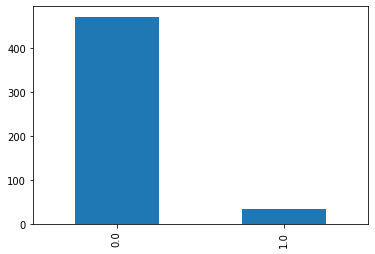

In [22]:
df['CHAS'].nunique()
df['CHAS'].unique()
df['CHAS'].value_counts()
df['CHAS']
import matplotlib.pyplot as plt 
df['CHAS'].value_counts().plot(kind='bar')

# Relaciones
Una relación típica entre variables que puede explorar es la correlación de Pearson, o el alcance de la relación lineal entre dos variables. El método corr lo muestra en formato de tabla para todas las columnas de un objeto DataFrame:

In [23]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_50
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,0.452220,-0.385832,0.254574
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.590769
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.516001
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.088659
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.597644
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.164465
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.870348
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.673813
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.361191
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.381395


Para solo ver la correlacion de una variable con las demas:

In [24]:
corr = df.corr(method='pearson')
corr_with_homevalue = corr.iloc[-1]
corr_with_homevalue[corr_with_homevalue.argsort()[::-1]]

AGE_50     1.000000
AGE        0.870348
NOX        0.597644
INDUS      0.516001
LSTAT      0.468146
TAX        0.381395
RAD        0.361191
CRIM       0.254574
PTRATIO    0.236216
CHAS       0.088659
RM        -0.164465
MEDV      -0.289750
ZN        -0.590769
DIS       -0.673813
Name: AGE_50, dtype: float64

# Mapa termico de correlaciones

<AxesSubplot:>

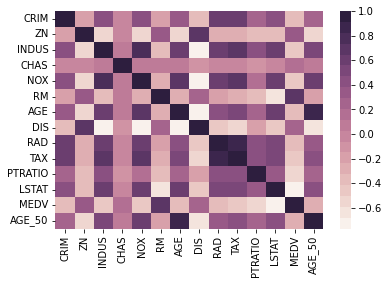

In [30]:
import seaborn as sns
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <BarContainer object of 50 artists>)

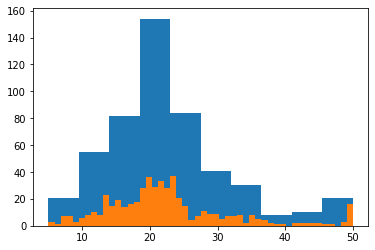

In [33]:
plt.hist(df['MEDV'])
#puede aumentar manualmente el número de discretizaciones del histograma:
plt.hist(df['MEDV'],bins=50)

d:\Python\Data science y big data\numpy and pandas\envi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

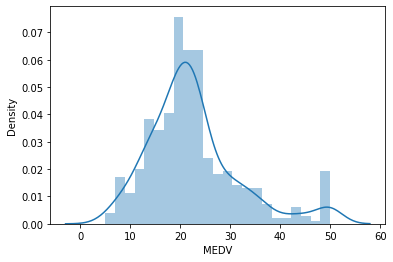

In [34]:
sns.distplot(df['MEDV'])

Otro trazado que se suele utilizar es jointplot de Seaborn, que combina histogramas para dos columnas, junto con un gráfico de dispersión:

d:\Python\Data science y big data\numpy and pandas\envi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


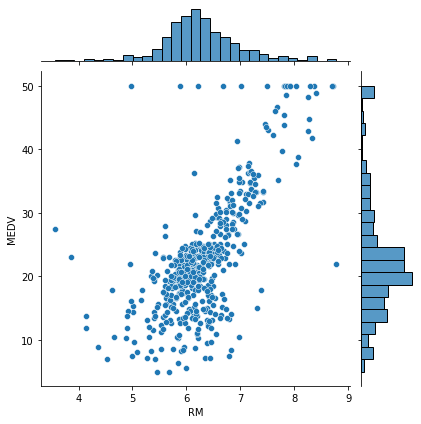

In [35]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter')

d:\Python\Data science y big data\numpy and pandas\envi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


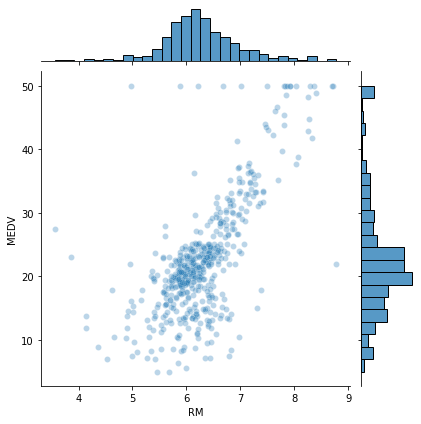

In [36]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter', alpha=0.3)

# KDE 

d:\Python\Data science y big data\numpy and pandas\envi\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

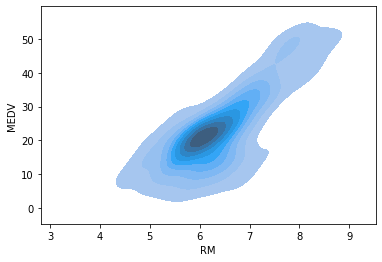

In [37]:
sns.kdeplot(df['RM'], df['MEDV'], shade=True)

# pairplot

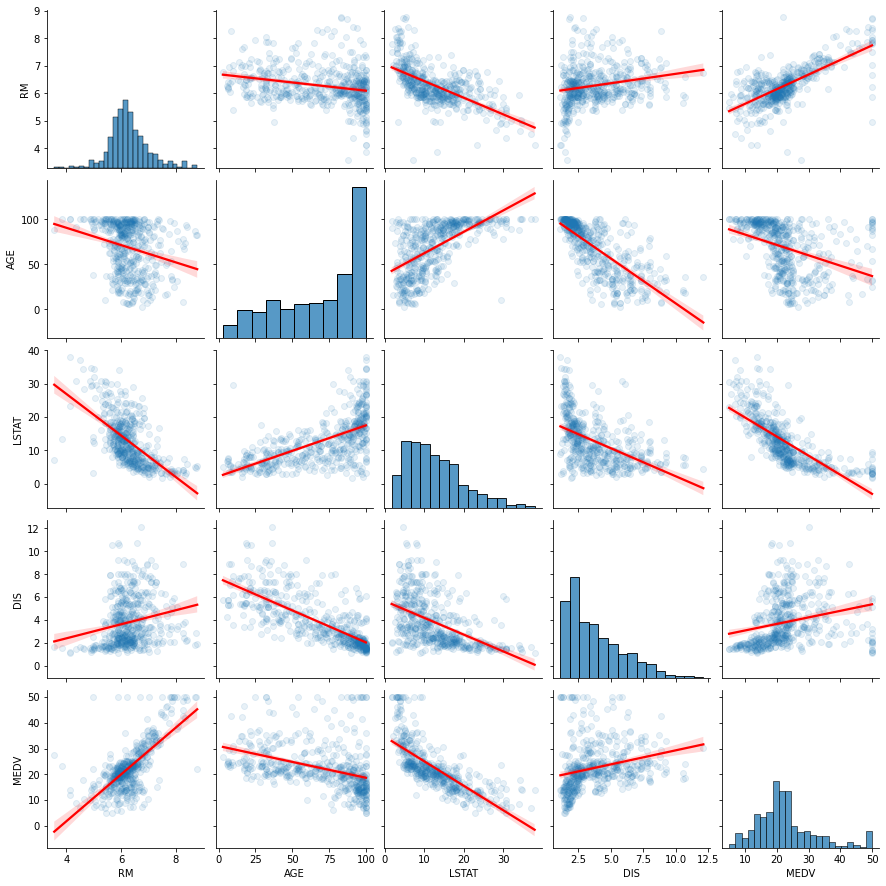

In [38]:
sns.pairplot(df[['RM', 'AGE', 'LSTAT', 'DIS', 'MEDV']], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})